In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_excel('/content/Exemplo 50k.xlsx')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Columns: 190 entries, DT_NOTIFIC to TABAG
dtypes: datetime64[ns](27), float64(103), int64(12), object(48)
memory usage: 72.5+ MB


In [26]:
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,VG_ENC,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG
0,2023-02-08,6,2023-01-23,4,RS,014 CRS,1602.0,CAMPINA DAS MISSOES,430370,POSTO DE SAUDE SEDE E PACS CAMPINA DAS MISSOES,...,NaN,NaN,2.0,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1,2023-02-27,9,2023-02-25,8,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,...,NaN,NaN,2.0,NaN,NaN,NaN,NaT,NaT,NaN,NaN
2,2023-03-17,11,2023-03-12,11,SP,GVE XVI BOTUCATU,1341.0,BOTUCATU,350750,HOSPITAL UNIMED BOTUCATU,...,NaN,NaN,2.0,NaN,NaN,NaN,NaT,NaT,NaN,NaN
3,2023-03-21,12,2023-03-18,11,PR,17RS LONDRINA,1371.0,LONDRINA,411370,HOSPITAL DO CORACAO UNIDADE BELA SUICA,...,NaN,NaN,2.0,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4,2023-03-29,13,2023-03-26,13,SC,SAO MIGUEL DO OESTE,1548.0,GUARACIABA,420640,ASSOCIACAO BENEFICIENTE HOSPITAL SAO LUCAS,...,NaN,NaN,2.0,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [27]:
df.columns

Index(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT',
       'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT', 'ID_UNIDADE',
       ...
       'VG_ENC', 'VG_REINF', 'REINF', 'FAB_ADIC', 'LOT_RE_BI', 'FAB_RE_BI',
       'DOSE_ADIC', 'DOS_RE_BI', 'LOTE_ADIC', 'TABAG'],
      dtype='object', length=190)

# Cleaning

In [47]:
# Supondo que 'df' seja o seu DataFrame original
# Substitua 'df' pelo nome do seu DataFrame

# Calcula a porcentagem de valores nulos em cada coluna
null_percentage = df.isnull().mean() * 100

# Seleciona as colunas com mais de 75% de valores nulos
columns_with_high_null_percentage = null_percentage[null_percentage > 80]
print(columns_with_high_null_percentage)

# Cria um novo DataFrame com as colunas selecionadas e suas porcentagens de valores nulos
new_df = pd.DataFrame(columns_with_high_null_percentage, columns=['Porcentagem de Nulos'])

new_df.head()


OBES_IMC       99.755990
MORB_DESC      81.437257
DT_UT_DOSE     96.307852
MAE_VAC        93.979759
DT_VAC_MAE     99.807992
                 ...    
FAB_RE_BI      92.337694
DOSE_ADIC      98.183927
DOS_RE_BI      92.327693
LOTE_ADIC      98.223929
TABAG         100.000000
Length: 84, dtype: float64


,Porcentagem de Nulos
OBES_IMC,99.755990
MORB_DESC,81.437257
DT_UT_DOSE,96.307852
MAE_VAC,93.979759
DT_VAC_MAE,99.807992


In [48]:
new_df.sort_values(by='Porcentagem de Nulos')

,Porcentagem de Nulos
MORB_DESC,81.437257
DOSE_2REF,82.561302
FAB_COVRF2,82.611304
LOTE_REF2,82.623305
DT_SAIDUTI,84.193368
...,...
DT_TRT_COV,100.000000
CO_PS_VGM,100.000000
LO_PS_VGM,100.000000
VG_REINF,100.000000


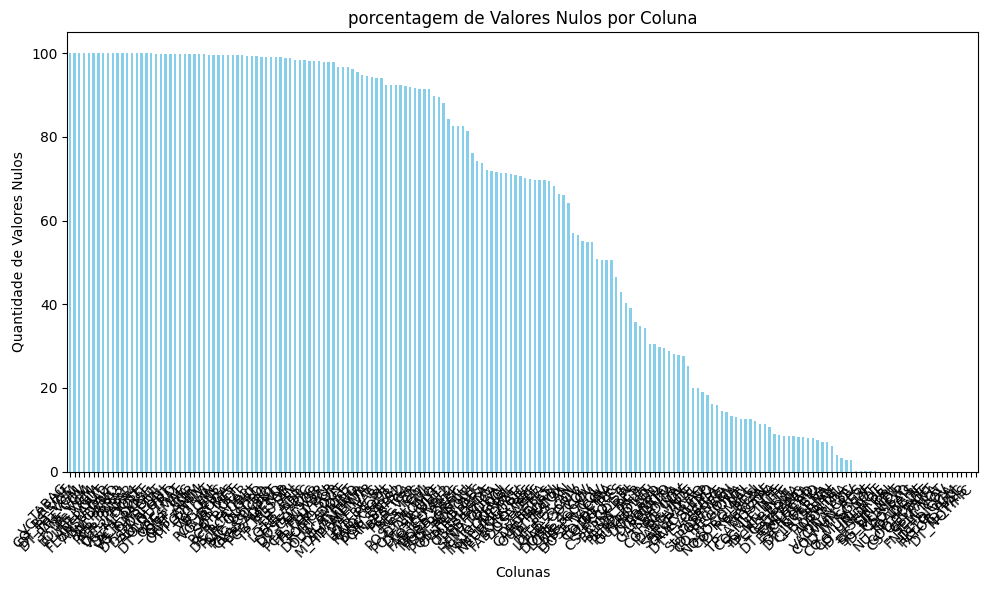

In [46]:
# Cria um gráfico de barras

null_count = (df.isnull().mean()* 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
null_count.plot(kind='bar', color='skyblue')
plt.title('porcentagem de Valores Nulos por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [55]:
df_filter = df.copy()

null_percentage = df_filter.isnull().mean() * 100

# Seleciona as colunas com mais de 75% de valores nulos
columns_to_drop = null_percentage[null_percentage > 80].index.tolist()
print(columns_to_drop)

df_filter.drop(columns=columns_to_drop, inplace=True)

['OBES_IMC', 'MORB_DESC', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE', 'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'DT_SAIDUTI', 'RAIOX_OUT', 'OUT_AMOST', 'TP_FLU_PCR', 'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO', 'OUT_ANIM', 'TOMO_OUT', 'DT_TOMO', 'POS_AN_FLU', 'TP_FLU_AN', 'POS_AN_OUT', 'AN_SARS2', 'AN_VSR', 'AN_PARA1', 'AN_PARA2', 'AN_PARA3', 'AN_ADENO', 'AN_OUTRO', 'DS_AN_OUT', 'TP_AM_SOR', 'SOR_OUT', 'DT_CO_SOR', 'TP_SOR', 'OUT_SOR', 'DT_RES', 'RES_IGG', 'RES_IGM', 'RES_IGA', 'DOSE_2REF', 'FAB_COVRF2', 'LOTE_REF2', 'TIPO_TRAT', 'OUT_TRAT', 'DT_TRT_COV', 'VG_OMS', 'VG_OMSOUT', 'VG_LIN', 'VG_MET', 'VG_METOUT', 'VG_DTRES', 'VG_ENC', 'VG_REINF', 'FAB_ADIC', 'LOT_RE_BI', 'FAB_RE_BI

In [56]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Columns: 106 entries, DT_NOTIFIC to REINF
dtypes: datetime64[ns](13), float64(58), int64(12), object(23)
memory usage: 40.4+ MB
